The purpose of this notebook is to show the distribution of homes on various features.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
from create_df import read_df
df, dfc, all_homes, appliance_min, national_average = read_df()

In [3]:
#Homes, Features
df.shape


(57, 166)

In [4]:
from common_functions import latexify, format_axes
latexify()

In [5]:
%matplotlib inline

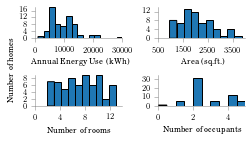

In [38]:
latexify(columns=1, fig_height=2)
fig, ax = plt.subplots(ncols=2, nrows=2)
dfc[['aggregate_%d' %i for i in range(1, 13)]].sum(axis=1).hist(bins=15, ax=ax[0,0])
ax[0,0].set_xlabel("Annual Energy Use (kWh)")
#ax[0,0].set_ylabel("Number of homes");

dfc.area.hist(ax=ax[0,1])
ax[0,1].set_xlabel("Area (sq.ft.)")

dfc.num_rooms.hist(ax=ax[1,0])
ax[1,0].set_xlabel("Number of rooms")

dfc.total_occupants.hist(ax=ax[1,1])
ax[1,1].set_xlabel("Number of occupants")

for i in range(0,2):
    for j in range(0,2):
        a = ax[i,j]
        a.set_xticks(a.get_xticks()[::2])
        a.set_yticks(a.get_yticks()[::2])
        a.grid(False)
        format_axes(a)


plt.tight_layout()
fig.text(0.004, 0.5, "Number of homes", ha='center', va='center', rotation='vertical')

plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/dataset.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/dataset.png",bbox_inches="tight")

In [28]:
ax[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12770e910>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x142f4c490>], dtype=object)

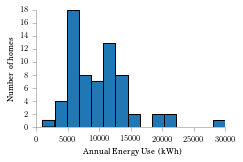

In [42]:
latexify()
dfc[['aggregate_%d' %i for i in range(1, 13)]].sum(axis=1).hist(bins=15)
plt.xlabel("Annual Energy Use (kWh)")
plt.ylabel("Number of homes");
ax = plt.gca()
plt.grid(False)
format_axes(ax)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_energy.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_energy.png",bbox_inches="tight")

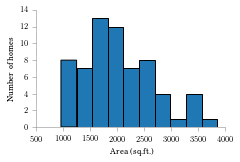

In [43]:
dfc.area.hist()
plt.xlabel("Area (sq.ft.)")
plt.ylabel("Number of homes");
format_axes(plt.gca())
plt.grid(False)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_area.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_areapng",bbox_inches="tight")

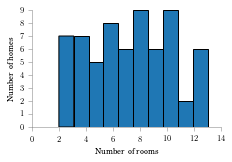

In [44]:
dfc.num_rooms.hist()
plt.xlabel("Number of rooms")
plt.ylabel("Number of homes");
format_axes(plt.gca())
plt.grid(False)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_num_rooms.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_num_rooms.png",bbox_inches="tight")

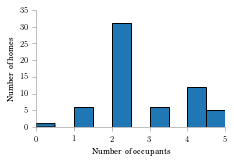

In [45]:
dfc.total_occupants.hist()
plt.xlabel("Number of occupants")
plt.ylabel("Number of homes");
format_axes(plt.gca())
plt.grid(False)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_num_occupants.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/description_num_occupants.png",bbox_inches="tight")

In [23]:
out = {}
appliance_name_map = {"fridge":"Fridge","hvac":"HVAC","wm":"Washing\nmachine",
                      "dr":"Dryer","dw":"Dish\nwasher","light":"Lights"}
for month in range(1, 13):
    out[month] = {}
    appliances = ["fridge","hvac","dr","dw","wm","light"]
    for appliance in appliances[:]:
        prop = dfc["%s_%d" %(appliance, month)].fillna(0).div(dfc["aggregate_%d" %month])
        prop = prop.replace([np.inf, -np.inf], np.nan)
        prop = prop.dropna()
        out[month][appliance_name_map[appliance]] = prop[prop>0].mean()

In [39]:
tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

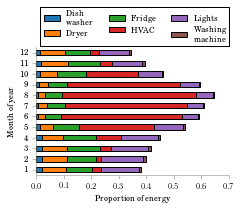

In [49]:
latexify(fig_height=2.4)
pd.DataFrame(out).T.plot(kind="barh",stacked=True, rot=0, colors=tableau20blind[::2]).legend(loc='upper left',
                                                                bbox_to_anchor=(0, 1.35), ncol=3,
                                                              )
plt.ylabel("Month of year")
plt.xlabel("Proportion of energy");
format_axes(plt.gca())
plt.tight_layout()
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/proportion_energy.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/proportion_energy.png",bbox_inches="tight")

In [38]:
units = {}
for month in range(1, 13):
    units[month] = {}
    appliances = ["fridge","hvac","dr","dw","wm","light"]
    for appliance in appliances[:]:
        a = df["%s_%d" %(appliance, month)].fillna(0)
        units[month][appliance] = a[a>0].mean()

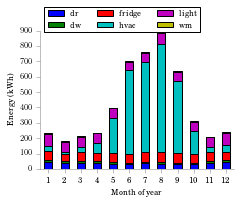

In [40]:
latexify(fig_height=2.6)
pd.DataFrame(units).T.plot(kind="bar",stacked=True, rot=0).legend(loc='upper left', bbox_to_anchor=(0, 1.2), ncol=3)
plt.xlabel("Month of year")
plt.ylabel("Energy (kWh)");
format_axes(plt.gca())
plt.tight_layout()
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/appliance_energy.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/appliance_energy.png",bbox_inches="tight")